In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
def is_numeric_column(column):
    try:
        pd.to_numeric(column, errors='raise')
        return True
    except ValueError:
        return False

def prepare_data_new(data):
    data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
    data.drop(['Alley'], axis=1,inplace=True)
    data.drop(['FireplaceQu'], axis=1,inplace=True)
    data.drop(['PoolQC'], axis=1,inplace=True)
    data.drop(['Fence'], axis=1,inplace=True)
    data.drop(['MiscFeature'], axis=1,inplace=True)
    for column in data.columns:
        if data[column].isnull().sum()>0:
            data[column] = data[column].fillna(data[column].mode()[0])
        data_column = data[[column]].values
        if not is_numeric_column(data[column]):
            label = LabelEncoder()
            label.fit(data[column])
            data[column]=label.transform(data[column])
        elif column!='SalePrice':
            scaler = StandardScaler()
            data_column =  scaler.fit_transform(data_column)
            data[column] = data_column
            
def plot_standart(real,pred):
    plt.plot(real, label='Real')
    plt.plot(pred, label='Prediction')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Real vs Prediction')
    plt.show()
    
def plot_sorted(real,pred):
    real_sorted=sorted(real)
    pred_sorted=sorted(pred)
    plt.plot(real_sorted, label='Real')
    plt.plot(pred_sorted, label='Prediction')
    plt.legend()
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Real vs Prediction')
    plt.show()
    
def hist_prediction(real,pred):
    bin_count=100
    plt.hist(pred, bins=bin_count, edgecolor='black')
    plt.hist(real, bins=bin_count, edgecolor='black')
    plt.xlabel('Index')
    plt.ylabel('Count')
    plt.title('Распределение')

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

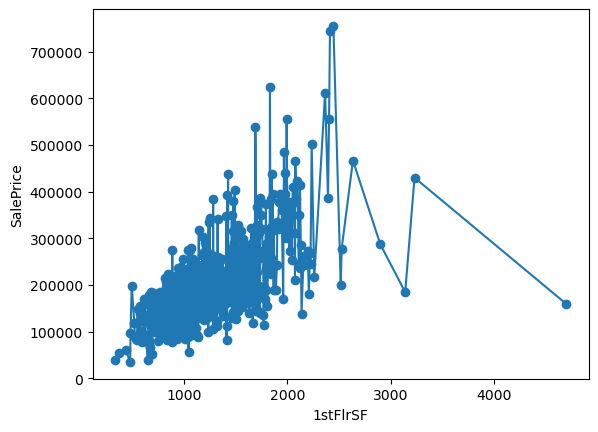

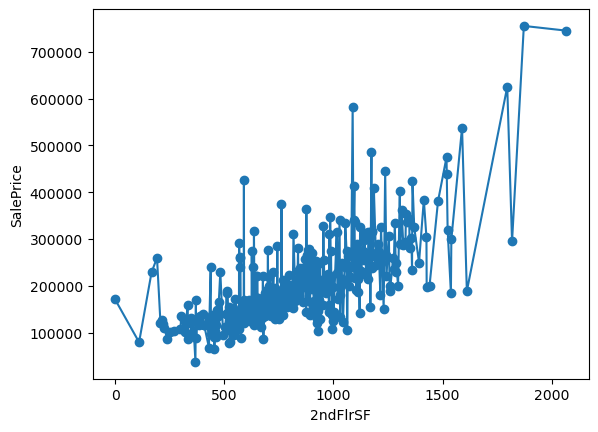

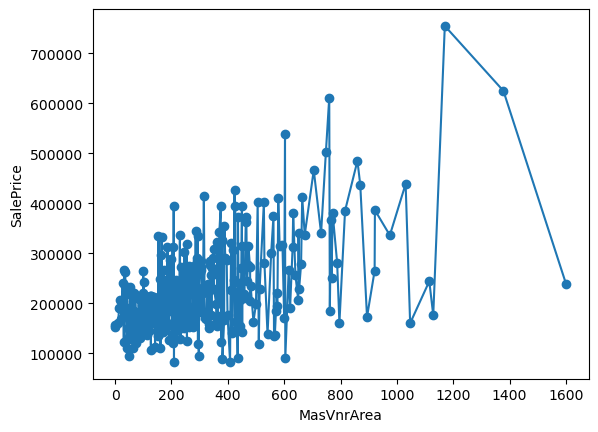

In [6]:
params = ['1stFlrSF','2ndFlrSF','MasVnrArea']
for param in params:
    class_price = data.groupby(param)[['SalePrice']].mean()
    param_values = class_price.index.values
    saleprice_values = class_price['SalePrice'].values
    plt.plot(param_values, saleprice_values, 'o-')

    plt.xlabel(param)
    plt.ylabel('SalePrice')

    plt.show()

In [7]:
prepare_data_new(data)
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [8]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,3,-2.293718e-01,-0.207142,1,3,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,208500
1,-1.728492,-0.872563,3,4.519361e-01,-0.091886,1,3,3,0,2,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,181500
2,-1.726120,0.073375,3,-9.311018e-02,0.073480,1,0,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,223500
3,-1.723747,0.309859,3,-4.564744e-01,-0.096897,1,0,3,0,0,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,140000
4,-1.721374,0.073375,3,6.336182e-01,0.375148,1,0,3,0,2,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,250000
5,-1.719002,-0.163109,3,6.790387e-01,0.360616,1,0,3,0,4,...,-0.359325,10.802446,-0.270208,-0.068692,1.323736,1.360892,0.891994,8,4,143000
6,-1.716629,-0.872563,3,2.248335e-01,-0.043379,1,3,3,0,4,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,8,4,307000
7,-1.714256,0.073375,3,6.454645e-16,-0.013513,1,0,3,0,0,...,3.372372,-0.116339,-0.270208,-0.068692,0.618024,1.730892,0.891994,8,4,200000
8,-1.711883,-0.163109,4,-8.652591e-01,-0.440659,1,3,3,0,4,...,2.995929,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,0.138777,8,0,129900
9,-1.709511,3.147673,3,-9.106796e-01,-0.310370,1,3,3,0,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,0.138777,8,4,118000


Text(0.5, 1.0, 'Распределение SalePrice')

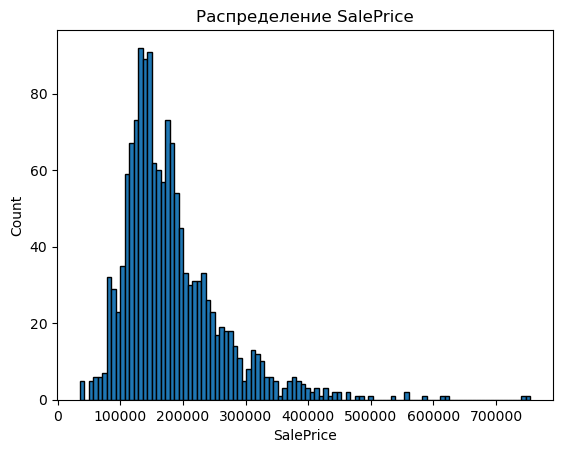

In [9]:
plt.hist(data['SalePrice'], bins=100, edgecolor='black')

plt.xlabel('SalePrice')
plt.ylabel('Count')

plt.title('Распределение SalePrice')

In [10]:
train_target = data['SalePrice']
drop_params = ['Id']
#drop_params = data.drop(['OverallQual','OverallCond', 'SalePrice','ExterQual', 'ExterCond','SaleCondition','SaleType','BsmtQual','BsmtCond','1stFlrSF','2ndFlrSF','MasVnrArea','LotArea'], axis=1)
train_data = data.drop(drop_params, axis=1)
train_data = train_data.drop('SalePrice', axis=1)

In [11]:
#model = LGBMRegressor(random_state=10, objective='mae', learning_rate=0.247332, n_estimators=300, num_leaves=30, max_depth=12, feature_fraction = 0.89952, min_data_in_leaf = 10)
model=RandomForestRegressor(max_depth=None,min_samples_split=2, n_estimators=200)

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],  # число деревьев
    'max_depth': [None, 5, 10],      # максимальная глубина деревьев
    'min_samples_split': [2, 5, 10]  # минимальное число объектов для разделения узла
}

grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
metric = metrics.mean_absolute_percentage_error(y_test, test_pred)
metric

0.10683987851779095

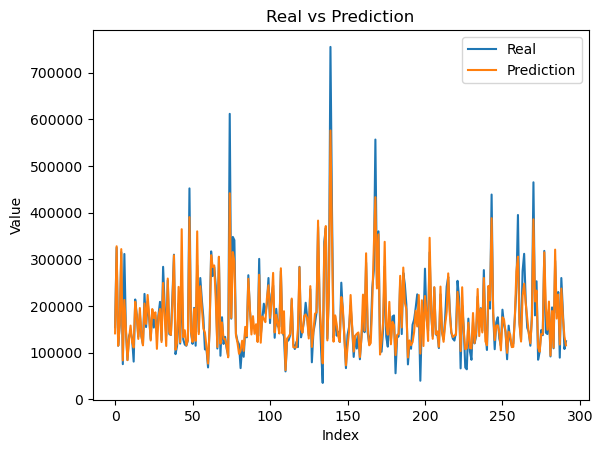

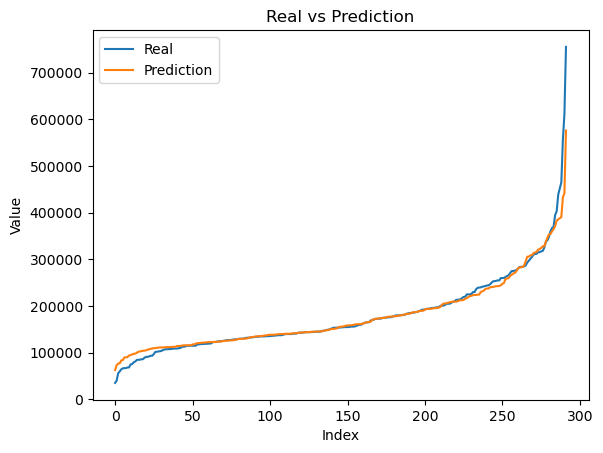

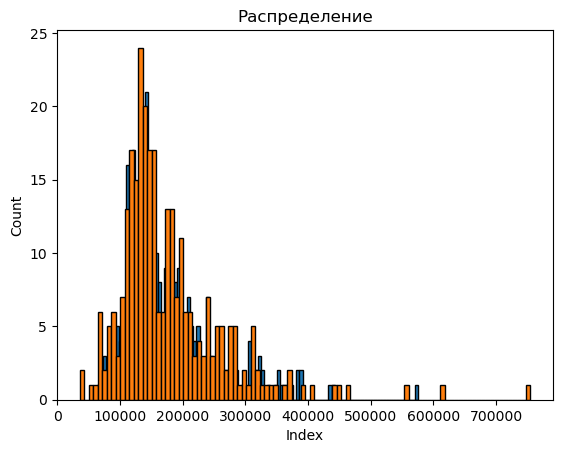

In [14]:
plot_standart(y_test.to_list(),test_pred)
plot_sorted(y_test,test_pred)
hist_prediction(y_test,test_pred)

In [15]:
#print("Лучшие параметры: ", grid_search.best_params_)
#print("Лучшее MSE: ", -grid_search.best_score_)